# Hakobyan Marta, Alaverdyan Elen

# Final Group Project

In this project, we explore housing market data to uncover the main factors that influence property prices. Using a dataset containing structural characteristics of homes, we aim to answer the central question: “What features drive the sale price of a house?”


# Data preprocessing


In [76]:

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization

In [78]:
df = pd.read_csv("House_Data.csv")
df

,Id,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,1,8450,196.0,150,856,856,854,1710,548,0,61,208500
1,2,9600,0.0,284,1262,1262,0,1262,460,298,0,181500
2,3,11250,162.0,434,920,920,866,1786,608,0,42,223500
3,4,9550,0.0,540,756,961,756,1717,642,0,35,140000
4,5,14260,350.0,490,1145,1145,1053,2198,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,0.0,953,953,953,694,1647,460,0,40,175000
1456,1457,13175,119.0,589,1542,2073,0,2073,500,349,0,210000
1457,1458,9042,0.0,877,1152,1188,1152,2340,252,0,60,266500
1458,1459,9717,0.0,0,1078,1078,0,1078,240,366,0,142125


In [80]:
df.dropna(inplace = True)

print(df.isnull().sum())

Id             0
LotArea        0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
GarageArea     0
WoodDeckSF     0
OpenPorchSF    0
SalePrice      0
dtype: int64


In [82]:
df.describe()


,Id,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,729.822314,10507.276171,103.685262,567.070937,1055.847107,1161.270661,346.944215,1514.091598,472.475207,94.416667,46.390496,180615.063361
std,421.938123,9989.563592,181.066207,442.082927,438.119089,385.018424,436.370724,525.627765,214.106397,125.393706,66.048619,79285.541485
min,1.000000,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,364.750000,7538.750000,0.000000,222.500000,794.750000,882.000000,0.000000,1128.000000,327.750000,0.000000,0.000000,129900.000000
50%,729.500000,9478.500000,0.000000,477.500000,990.500000,1086.000000,0.000000,1461.500000,478.000000,0.000000,24.000000,162700.000000
75%,1095.250000,11600.000000,166.000000,808.000000,1297.250000,1391.000000,728.000000,1776.000000,576.000000,168.000000,68.000000,214000.000000
max,1460.000000,215245.000000,1600.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,547.000000,755000.000000


In [84]:
print(df.dtypes)


Id               int64
LotArea          int64
MasVnrArea     float64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
GrLivArea        int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
SalePrice        int64
dtype: object


In [86]:
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors = 'coerce')
df['MasVnrArea'] = df['MasVnrArea'].astype('int64')

print(df.dtypes)

Id             int64
LotArea        int64
MasVnrArea     int64
BsmtUnfSF      int64
TotalBsmtSF    int64
1stFlrSF       int64
2ndFlrSF       int64
GrLivArea      int64
GarageArea     int64
WoodDeckSF     int64
OpenPorchSF    int64
SalePrice      int64
dtype: object


# Data visualisations

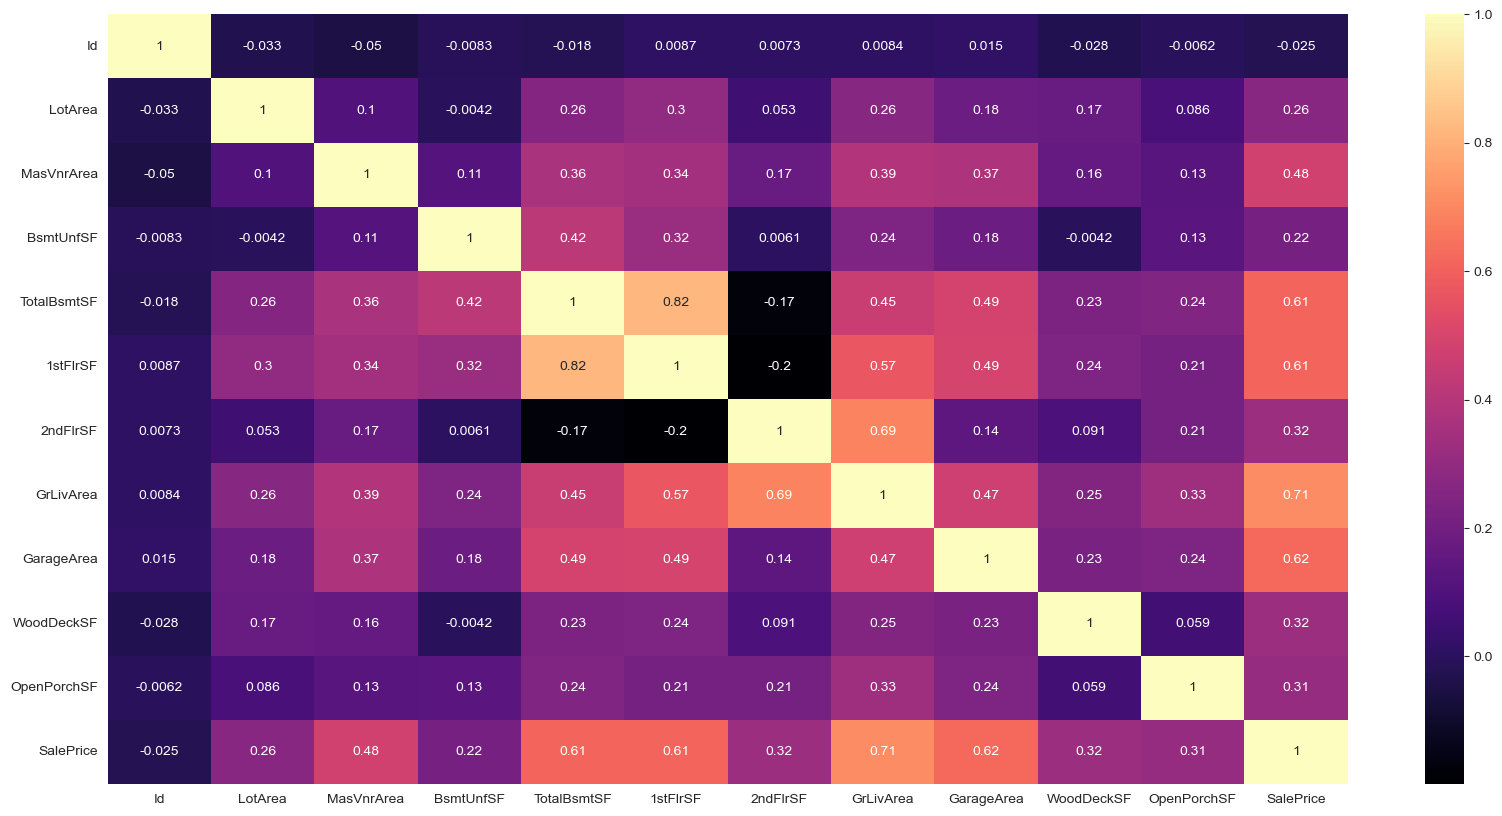

In [16]:
# heatmap
sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

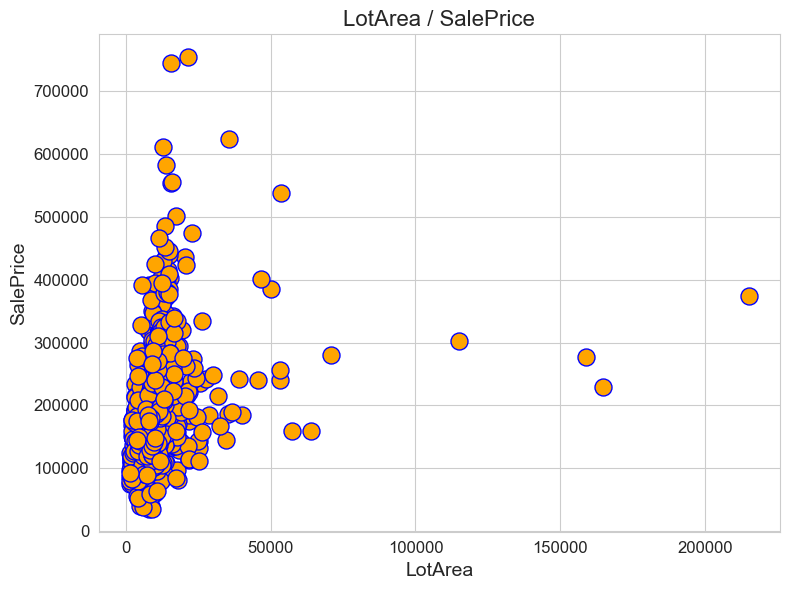

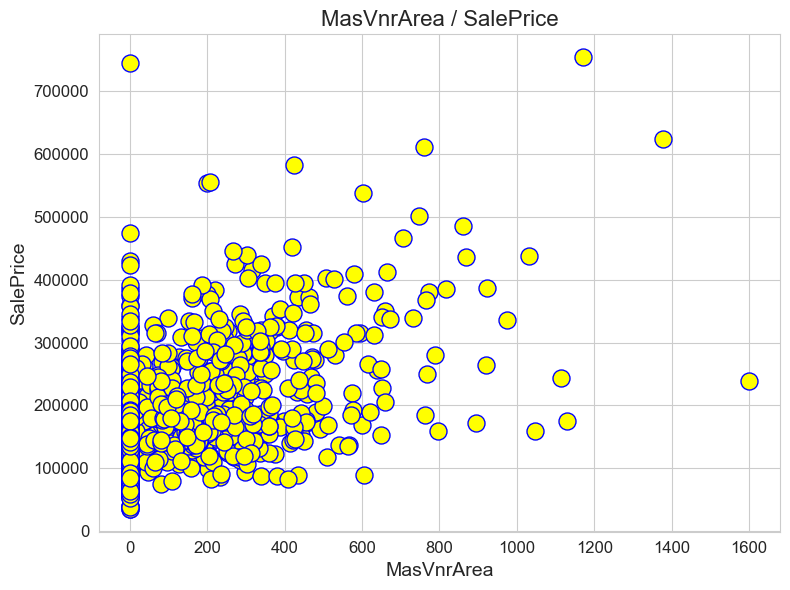

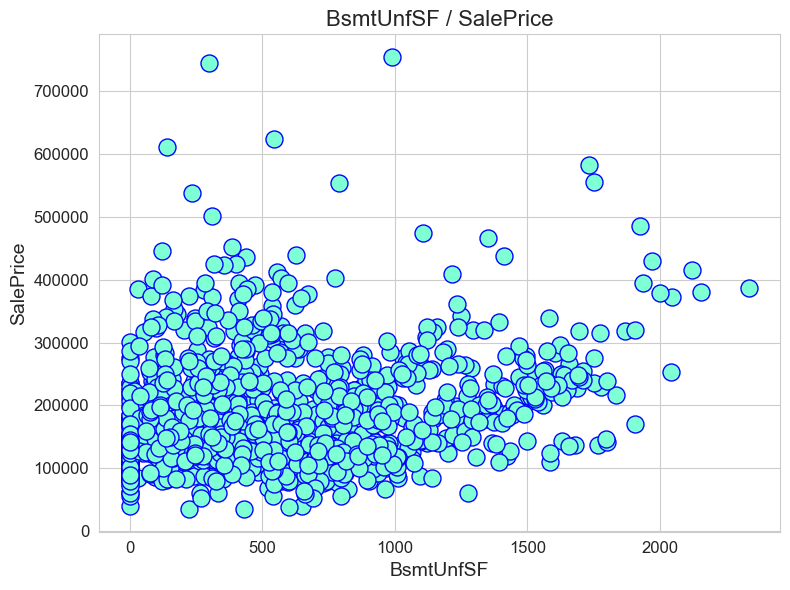

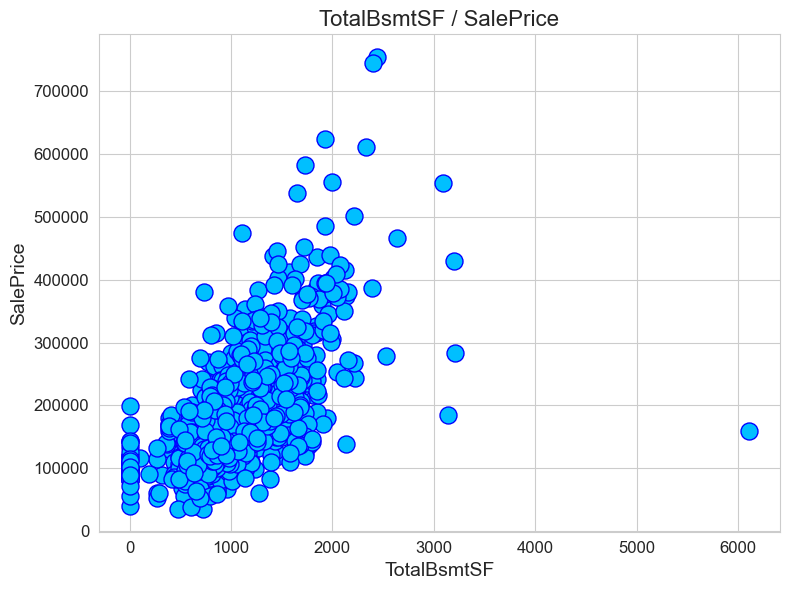

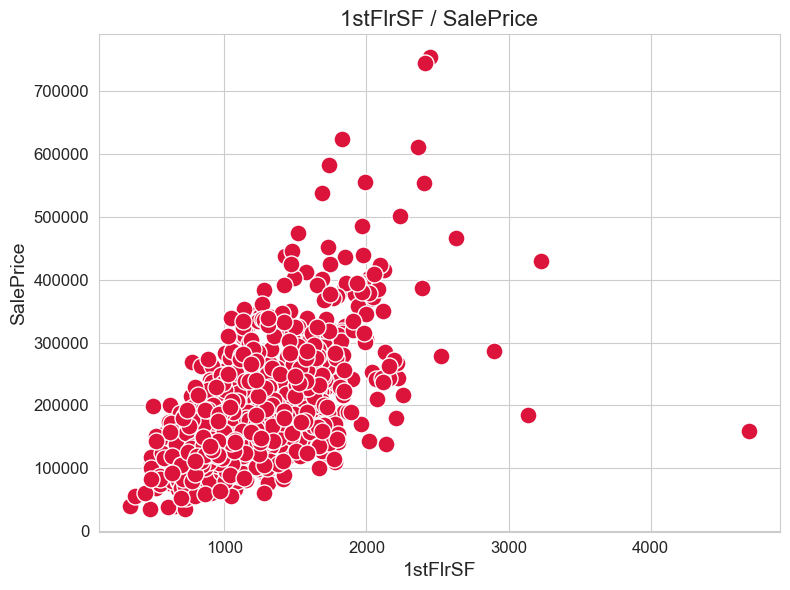

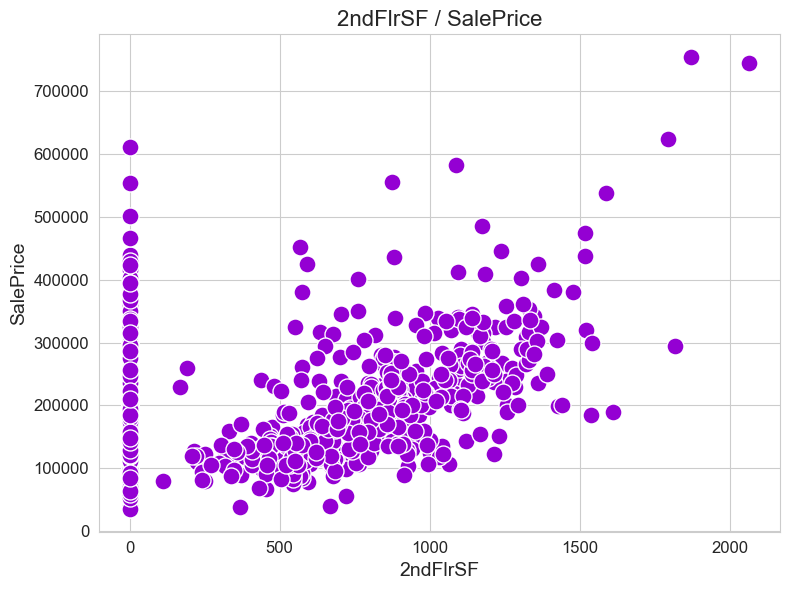

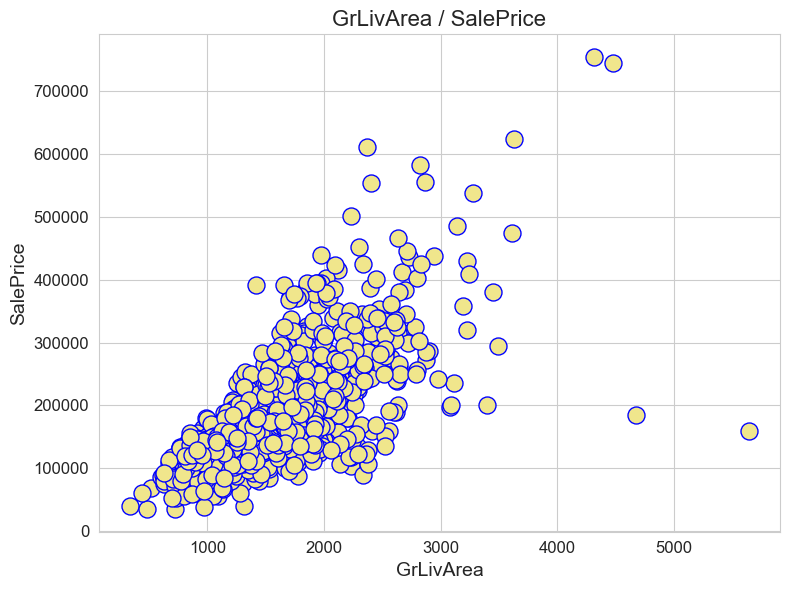

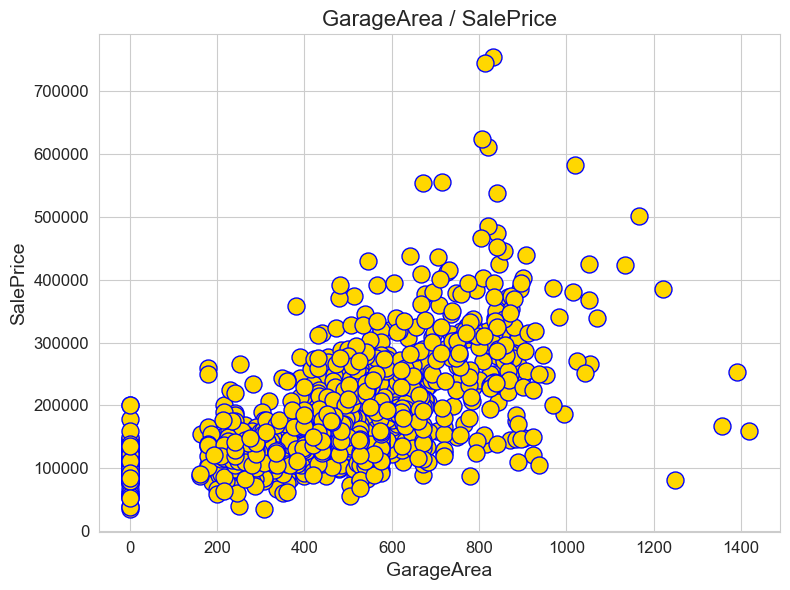

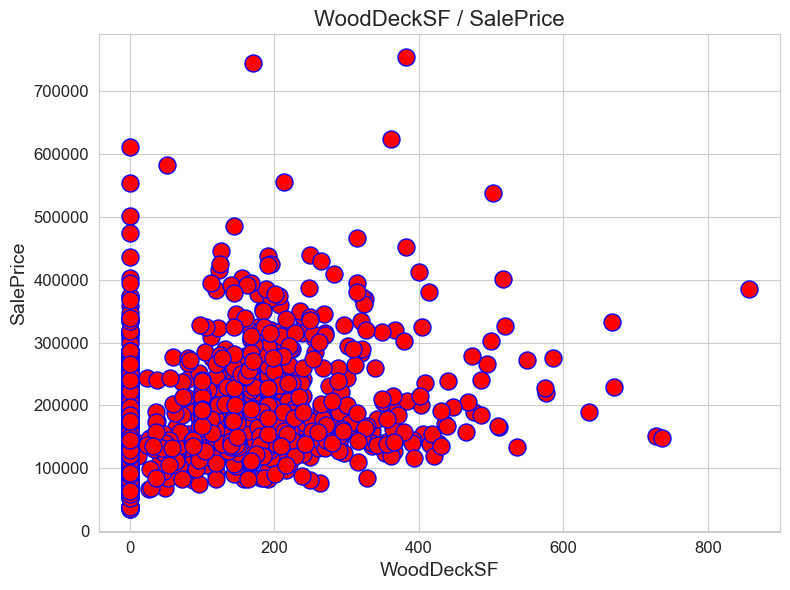

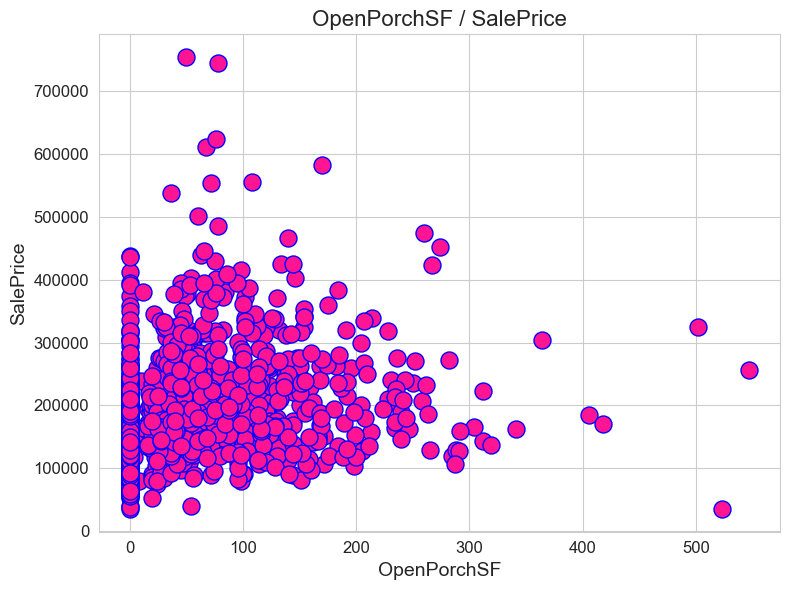

In [93]:
# Scatter plot 
def scatter_df(y_var):
    
    cols = df.drop(columns=[y_var, 'Id']).columns

    colors = ['orange', 'yellow', 'aquamarine', 'deepskyblue', 'crimson',
              'darkviolet', 'khaki', 'gold', 'red', 'deeppink']
    edges = ['b', 'b', 'b', 'b', 'white', 'white', 'b', 'b', 'b', 'b']

    for idx, col in enumerate(cols[:10]):
        plt.figure(figsize=(8, 6))
        sb.scatterplot(x=col, y=y_var, data=df, color=colors[idx], edgecolor=edges[idx], s=150)
        plt.title(f'{col} / {y_var}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel(y_var, fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.savefig(f'scatter{idx+1}.png')
        plt.show()
scatter_df('SalePrice')


In [96]:
# Plot density of SalePrice by featuress

def plot_saleprice_density_by_binned_feature(df, feature, max_bins=3):

    col_data = df[feature].dropna()
    
    unique_vals = col_data.nunique()

    if unique_vals < 2:
        print(f"Skipping {feature}: not enough unique values.")
        return

    bins = min(max_bins, unique_vals)
    bin_labels = ['Low', 'Medium', 'High'][:bins]

    try:
        df[f'{feature}_bin'] = pd.qcut(df[feature], q=bins, labels=bin_labels, duplicates='drop')
    except Exception as e:
        print(f"Skipping {feature} due to error: {e}")
        return

    plt.figure(figsize=(10, 6))
    for label in bin_labels:
        sb.kdeplot(
            data=df[df[f'{feature}_bin'] == label],
            x='SalePrice',
            fill=True,
            label=f'{label} {feature}'
        )

    plt.title(f'Density Plot of Sale Price by {feature} (binned)', fontsize=16)
    plt.xlabel('Sale Price')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()


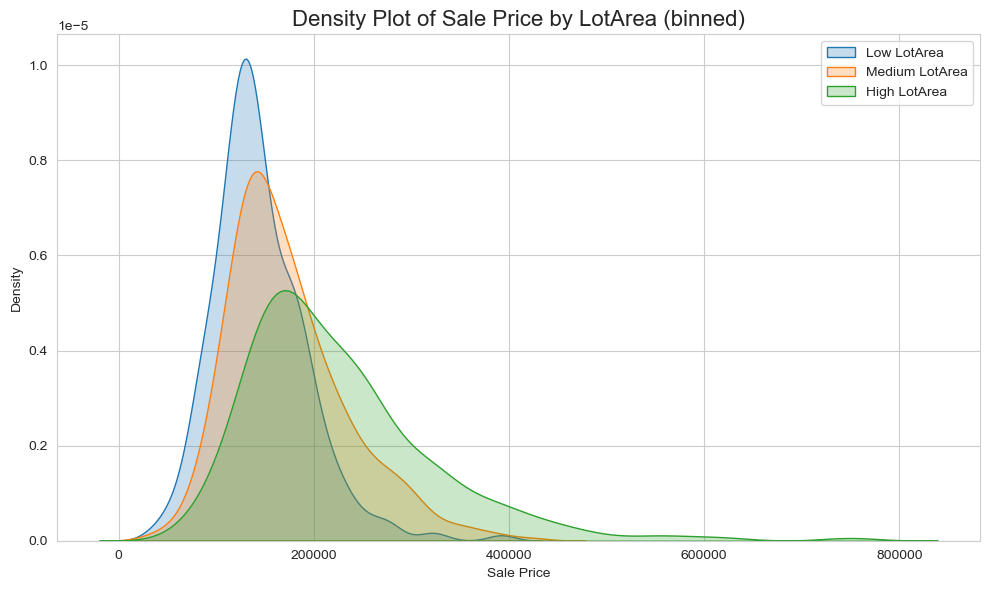

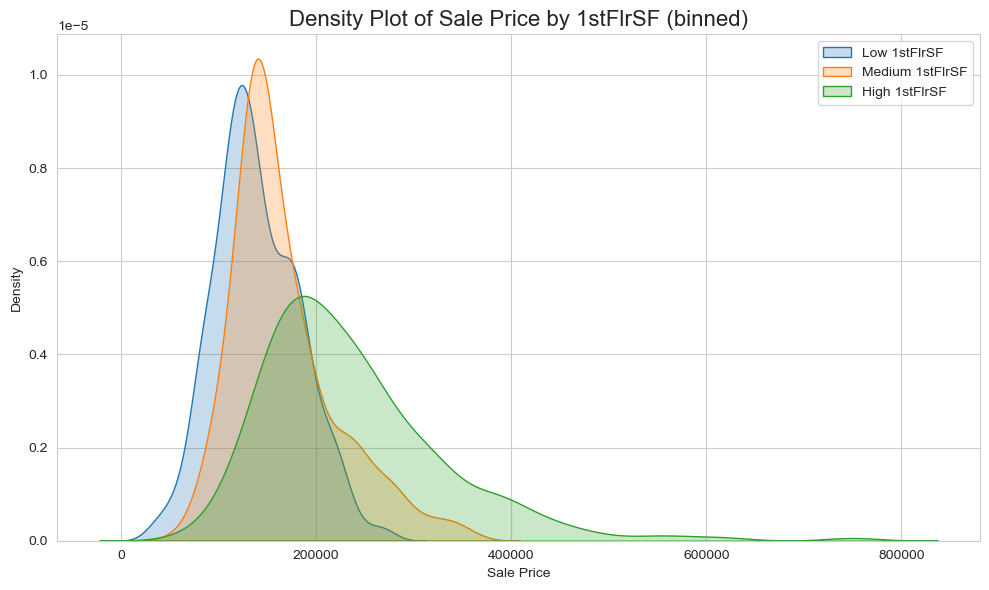

Skipping 2ndFlrSF due to error: Bin labels must be one fewer than the number of bin edges


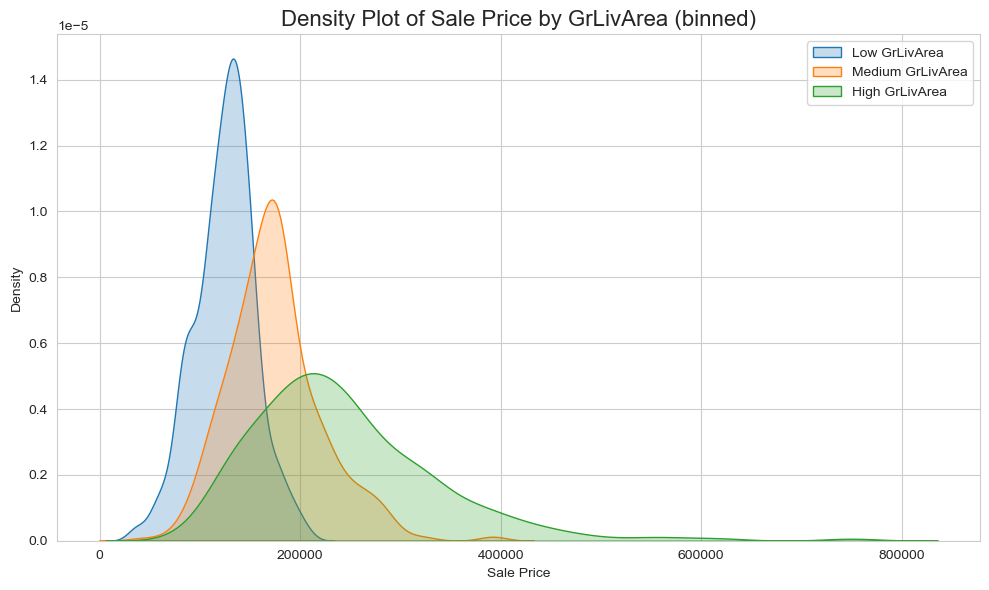

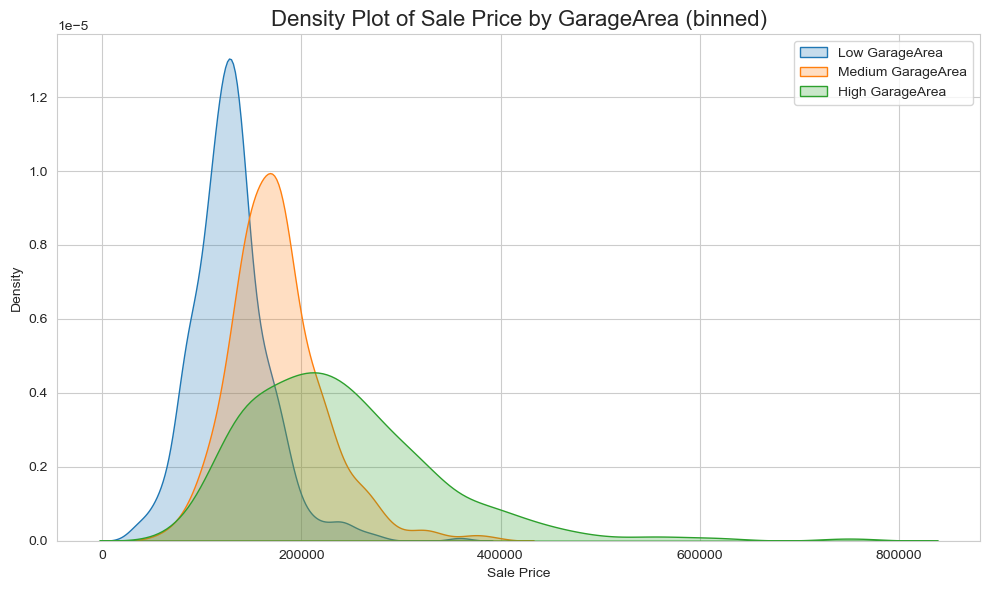

Skipping OpenPorchSF due to error: Bin labels must be one fewer than the number of bin edges


In [133]:
features = [
    'LotArea',  '1stFlrSF',
    '2ndFlrSF', 'GrLivArea', 'GarageArea',  'OpenPorchSF'
]

for feature in features:
    plot_saleprice_density_by_binned_feature(df, feature)


/var/folders/0q/frw4cxsd0qsb96d113lmzsy80000gn/T/ipykernel_3123/2498421278.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




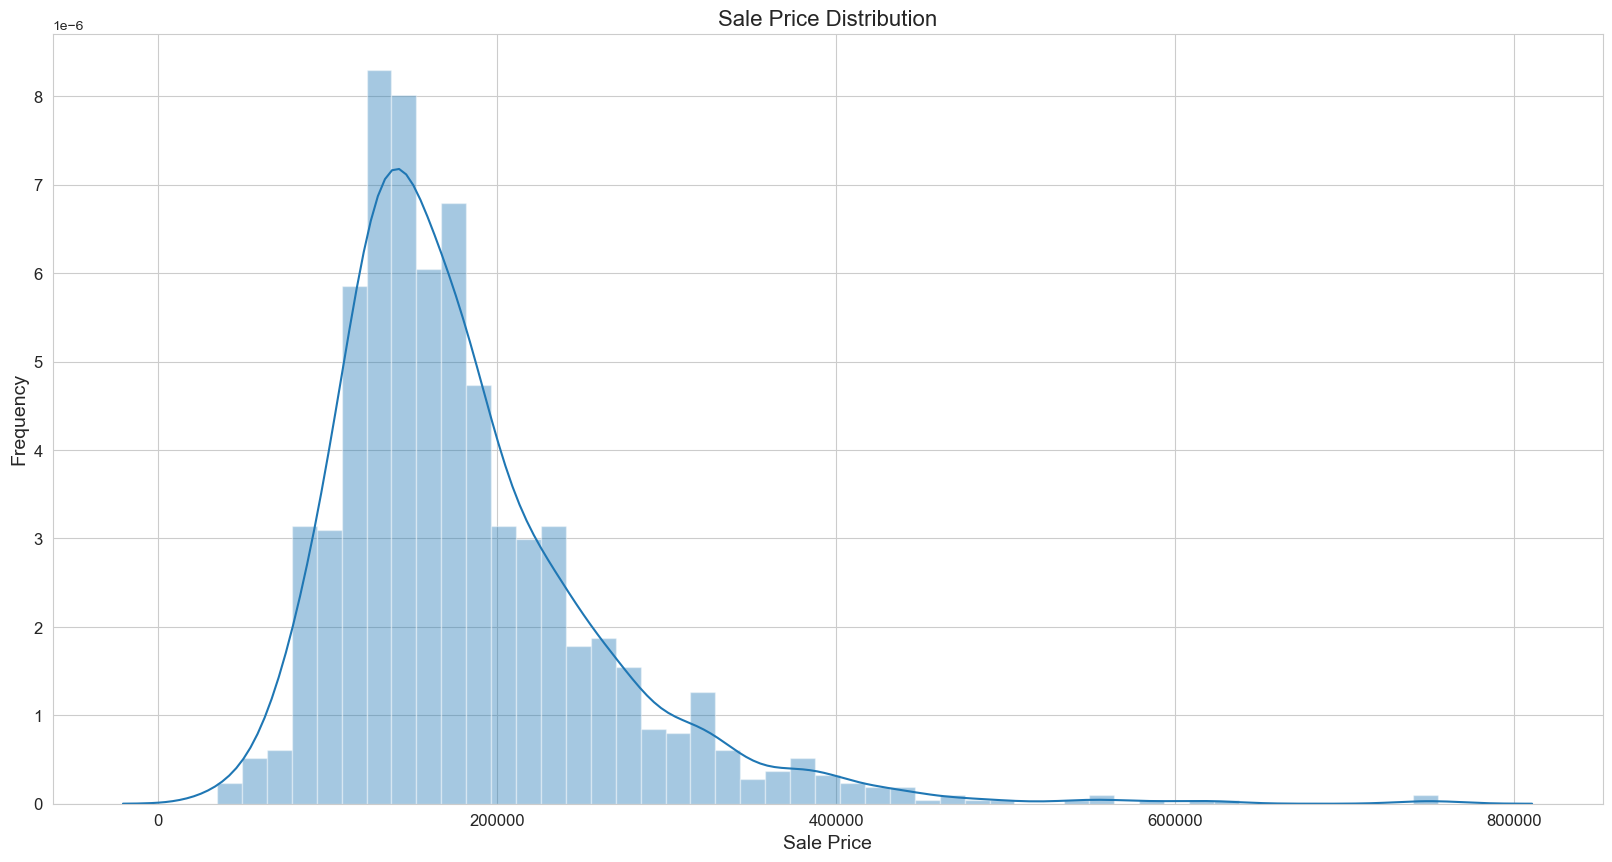

In [100]:
sb.distplot(df['SalePrice'])
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

# hypothesis

In [103]:
# Hypothesis 1: Houses with garages are more expensive than those without

from scipy.stats import ttest_ind

df["HasGarage"] = (df["GarageArea"] > 0).astype(int)

garage_yes = df[df["HasGarage"] == 1]["SalePrice"].dropna()
garage_no  = df[df["HasGarage"] == 0]["SalePrice"].dropna()

t_stat1, p_val1 = ttest_ind(garage_yes, garage_no, equal_var=False)
print("Hypothesis 1: Garage affects house price")
print(f"Houses with garage: {len(garage_yes)}")
print(f"Houses without garage: {len(garage_no)}")
print(f"t-statistic = {t_stat1:.3f}, p-value = {p_val1:.4e}")


Hypothesis 1: Garage affects house price
Houses with garage: 1371
Houses without garage: 81
t-statistic = 19.387, p-value = 7.5753e-42


In [105]:
# Hypothesis 2: Having an open porch increases house price

df["HasPorch"] = (df["OpenPorchSF"] > 0).astype(int)

porch_yes = df[df["HasPorch"] == 1]["SalePrice"].dropna()
porch_no  = df[df["HasPorch"] == 0]["SalePrice"].dropna()
t_stat2, p_val2 = ttest_ind(porch_yes, porch_no, equal_var=False)
print("\nHypothesis 2: Porch affects house price")
print(f"Houses with porch: {len(porch_yes)}")
print(f"Houses without porch: {len(porch_no)}")
print(f"t-statistic = {t_stat2:.3f}, p-value = {p_val2:.4e}")



Hypothesis 2: Porch affects house price
Houses with porch: 798
Houses without porch: 654
t-statistic = 18.067, p-value = 1.5556e-65


In [107]:
#Hypothesis 3: House price differs across small, medium, and large homes

from scipy.stats import f_oneway

df["SizeGroup"] = pd.qcut(df["GrLivArea"], q=3, labels=["Small", "Medium", "Large"])

small  = df[df["SizeGroup"] == "Small"]["SalePrice"].dropna()
medium = df[df["SizeGroup"] == "Medium"]["SalePrice"].dropna()
large  = df[df["SizeGroup"] == "Large"]["SalePrice"].dropna()

f_stat, p_val3 = f_oneway(small, medium, large)
print("\nHypothesis 3: Size group affects house price")
print(f"f-statistic = {f_stat:.3f}, p-value = {p_val3:.4e}")



Hypothesis 3: Size group affects house price
f-statistic = 439.806, p-value = 5.3959e-150


In [45]:
df["PriceTier"] = pd.qcut(df["SalePrice"], q=5, labels=["Tier 1", "Tier 2", "Tier 3", "Tier 4", "Tier 5"])


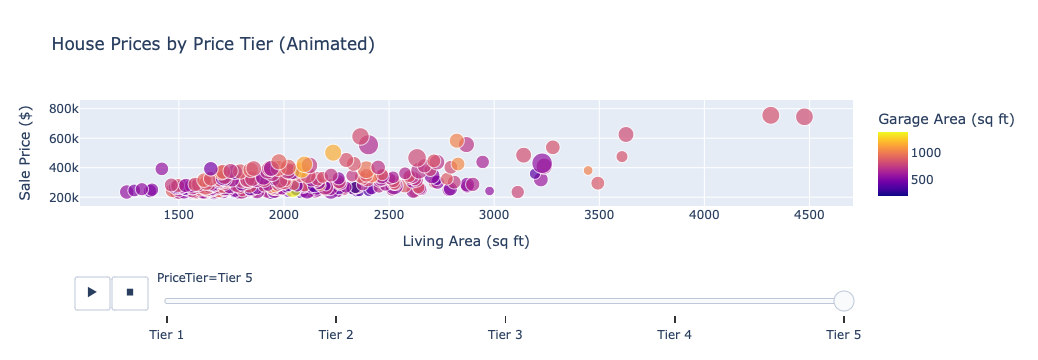

In [47]:
import plotly.express as px

fig = px.scatter(df, 
                 x="GrLivArea", 
                 y="SalePrice",
                 size="TotalBsmtSF", 
                 color="GarageArea",
                 animation_frame="PriceTier",
                 title="House Prices by Price Tier (Animated)",
                 labels={
                     "GrLivArea": "Living Area (sq ft)",
                     "SalePrice": "Sale Price ($)",
                     "GarageArea": "Garage Area (sq ft)"
                 })
fig.show()


# DASH

In [49]:
pip install dash


Note: you may need to restart the kernel to use updated packages.


In [131]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

df["HasGarage"] = (df["GarageArea"] > 0).astype(int)
df["SizeGroup"] = pd.qcut(df["GrLivArea"], q=3, labels=["Small", "Medium", "Large"])

app = Dash(__name__)
app.title = "House Price Explorer"

app.layout = html.Div([
    html.H1(" House Price Explorer", style={'textAlign': 'center'}),

    html.Div([
        html.Label("Select Garage Option:"),
        dcc.Dropdown(
            id="garage-filter",
            options=[
                {"label": "With Garage", "value": 1},
                {"label": "No Garage", "value": 0}
            ],
            value=1
        ),

        html.Br(),

        html.Label("Select Size Group:"),
        dcc.Dropdown(
            id="size-filter",
            options=[
                {"label": str(size), "value": size}
                for size in df["SizeGroup"].unique()
            ],
            value="Medium"
        )
    ], style={"width": "30%", "display": "inline-block", "padding": "0 20px"}),

    html.Div([
        dcc.Graph(id="scatter-plot"),
        html.Br(),
        dcc.Graph(id="boxplot")
    ], style={"width": "68%", "display": "inline-block"}),

    html.Div(id="summary-output", style={"marginTop": "30px", "textAlign": "center", "fontSize": "18px"})
])

# Callback
@app.callback(
    Output("scatter-plot", "figure"),
    Output("boxplot", "figure"),
    Output("summary-output", "children"),
    Input("garage-filter", "value"),
    Input("size-filter", "value")
)
def update_graphs(garage_value, size_value):
    filtered_df = df[(df["HasGarage"] == garage_value) & (df["SizeGroup"] == size_value)]

    scatter_fig = px.scatter(filtered_df,
                             x="GrLivArea", y="SalePrice",
                             size="TotalBsmtSF", color="GarageArea",
                             labels={
                                 "GrLivArea": "Living Area (sq ft)",
                                 "SalePrice": "Sale Price ($)",
                                 "GarageArea": "Garage Area (sq ft)"
                             },
                             title="GrLivArea vs SalePrice (Filtered)")

    box_df = df[df["HasGarage"] == garage_value]

    box_fig = px.box(box_df,
                     x="SizeGroup", y="SalePrice",
                     points="all",
                     title="Sale Price Distribution by Size Group",
                     labels={
                         "SizeGroup": "House Size Group",
                         "SalePrice": "Sale Price ($)"
                     })

    avg_price = filtered_df["SalePrice"].mean()
    count = len(filtered_df)
    summary = f" Showing {count} houses — Average Sale Price: ${avg_price:,.0f}"

    return scatter_fig, box_fig, summary

if __name__ == "__main__":
    app.run(debug=True)


#conclusions

# conclusions

Our analysis showed that the size of the living space (GrLivArea) and the presence of a garage play a big role in how much a house sells for. Simply put, homes with more space and a garage tend to be priced higher.